# Password Controller

In that project I will try to train a password controller model. I will train with a Tensorflow Keras model. It could understand 3 types of passwords.<br>
<ul>
<li>WEAK</li>
<li>MEDIUM</li>
<li>STRONG</li>
</ul>
Let's start.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ls

Password Controller.ipynb  dataset.csv
data.csv


In [3]:
df=pd.read_csv("dataset.csv",encoding="latin-1")

In [4]:
df.isnull().sum()

password    1
strength    0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df["strength_name"]=df["strength"].map({0:"WEAK",1:"MEDIUM",2:"STRONG"})

In that project I used a different TF IDF vectorizer that converts the password into a vector of numbers. Because what I normally use did not give good results.

In [6]:
def transform(password):
    character=[]
    for i in password:
        character.append(i)
    return character

In [7]:
x=np.array(df["password"])
y=np.array(df["strength"])

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
tfidf = CountVectorizer(tokenizer=transform)
x = tfidf.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

/Users/emirkaanozdemir/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [9]:
x_train=x_train.toarray()
x_test=x_test.toarray()

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
r=RandomForestClassifier()

In [12]:
r.fit(x_train,y_train)

RandomForestClassifier()

In [13]:
accuracy=r.score(x_test,y_test)

In [14]:
print(accuracy*100)

89.28006092825996


In [15]:
from sklearn.linear_model import LogisticRegression
Log=LogisticRegression()
from sklearn.metrics import classification_report
Log.fit(x_train,y_train)
y_pred=Log.predict(x_test)
print(classification_report(y_test,y_pred))

/Users/emirkaanozdemir/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17908
           1       1.00      1.00      1.00     99519
           2       1.00      1.00      1.00     16501

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928



In [16]:
import getpass
user = getpass.getpass("Enter Password: ")
data = tfidf.transform([user]).toarray()
output = r.predict(data)
print(output)

Enter Password: ········
[0]


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(120, activation="relu"))
model.add(Dense(80, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(3, activation="sigmoid"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
16741/16741 ━━━━━━━━━━━━━━━━━━━━ 14s 738us/step - accuracy: 0.9650 - loss: 0.1006 - val_accuracy: 0.9986 - val_loss: 0.0044
Epoch 2/10
16741/16741 ━━━━━━━━━━━━━━━━━━━━ 12s 720us/step - accuracy: 0.9981 - loss: 0.0059 - val_accuracy: 0.9999 - val_loss: 8.4065e-04
Epoch 3/10
16741/16741 ━━━━━━━━━━━━━━━━━━━━ 12s 715us/step - accuracy: 0.9989 - loss: 0.0036 - val_accuracy: 0.9999 - val_loss: 5.4642e-04
Epoch 4/10
16741/16741 ━━━━━━━━━━━━━━━━━━━━ 12s 737us/step - accuracy: 0.9992 - loss: 0.0025 - val_accuracy: 0.9998 - val_loss: 7.9456e-04
Epoch 5/10
16741/16741 ━━━━━━━━━━━━━━━━━━━━ 12s 738us/step - accuracy: 0.9993 - loss: 0.0025 - val_accuracy: 0.9999 - val_loss: 6.4905e-04
Epoch 6/10
16741/16741 ━━━━━━━━━━━━━━━━━━━━ 12s 719us/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 0.9999 - val_loss: 7.1808e-04
Epoch 7/10
16741/16741 ━━━━━━━━━━━━━━━━━━━━ 12s 724us/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.9976 - val_loss: 0.0078
Epoch 8/10
16741/16741 ━━━━━━━━━━━━

In [22]:
import getpass
user = getpass.getpass("Enter Password: ")
data = tfidf.transform([user]).toarray()
prediction = model.predict(data)
class_names=["Weak","Medium","Strong"]
strong=class_names[np.argmax(prediction)]
print(strong)

Enter Password: ········
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Medium


In [23]:
model.save("model.h5")

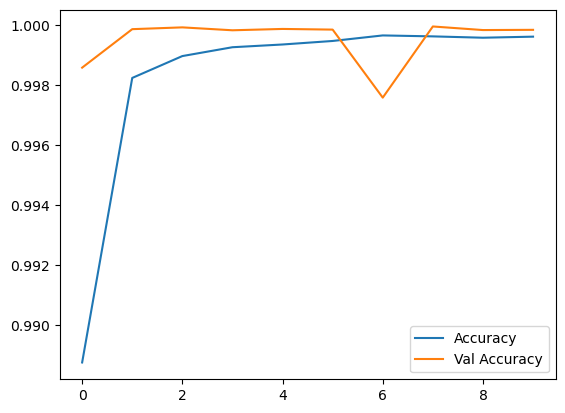

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],label="Accuracy")
plt.plot(history.history["val_accuracy"],label="Val Accuracy")
plt.legend();

My model has no under and over fitting. My accuracy score is pretty good. But metrics aren't enough alone. That's why I will develop a Streamlit app to test my model.